# Movimiento Browniano y dinámica estocástica

## Dinámica de Langevin de una partícula libre

Puedes generar trayectorias de dinámica de Langevin de una partícula libre con el código que encuentras en el notebook "Partícula Libre". Para comenzar a jugar con los conceptos propios de la dinámica browniana y la dinámica de langevin necesitaremos simular cinco escenarios distintos cuyas trayectorias guardarás en sus correspondientes ficheros. En todos ellos las siguientes variables serán constantes:

   - num_particles = 1, mass = 180.15 amu, step_size = 0.1 ps, steps_per_period = 100, num_periods = 500000

Y las cinco simulaciones con las que trabajaremos serán:

   - temperature = 300 K, friction = 5.0/ps, filename_traj = '1_particle_T300_F5.pkl'
   - temperature = 300 K, friction = 2.0/ps, filename_traj = '1_particle_T300_F2.pkl'
   - temperature = 300 K, friction = 10.0/ps, filename_traj = '1_particle_T300_F10.pkl'
   - temperature = 500 K, friction = 5.0/ps, filename_traj = '1_particle_T500_F5.pkl'
   - temperature = 100 K, friction = 5.0/ps, filename_traj = '1_particle_T100_F5.pkl'

Si eres miembro de la UIBCDF puedes encontrar en el directorio '/DATA/projects/Academia_data/movimiento_browniano/1_free_particle' de Ixtlilton los cinco ficheros producto de unas simulaciones ya ejecutadas.

### La trayectoria browniana

En primer lugar vamos a cargar las librerías de python a usar para la el análisis de las dinámicas de Langevin de esta sección. Vamos antes a hacer una breve descripción de ellas:

   - Numpy: Librería para la definición y manejo de vectores multidimensionales. Más información [aquí](/Glosario_librerias/Numpy.md).
   - Pickle: Librería para la escritura y lectura de objetos en ficheros. Más información [aquí](/Glosario_librerias/Pickle.md).
   - Unit: Librería, parte de simtk, para el manejo de unidades físicas. Más información [aquí](/Glosario_librerias/Unit.md).
   - Matplotlib: Librería para la representación gráfica de datos. Más información [aquí](/Glosario_librerias/Matplotlib.md).
   - Seaborn: Librería para la representación gráfica de datos. Más información [aquí](/Glosario_librerias/Seaborn.md).

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import simtk.unit as unit
import seaborn as sns

Para acontinuación cargar los vectores guardados de la trayectoria correspondiente a la dinámica browniana a temperatura 300K y fricción 5.0/ps:

In [6]:
file = open('1_particle_T300_F5.pkl','rb')

times = pickle.load( file )
positions = pickle.load( file )
velocities = pickle.load( file )

times = times.in_units_of(unit.microseconds)
positions = positions.in_units_of(unit.micrometer)
velocities = velocities.in_units_of(unit.micrometer/unit.microsecond)

file.close()

Veamos en primer

## Varias partículas libres

In [1]:
   - num_particles = 10000, num_periods = 10000, temperature = 300 K, friction = 5.0/ps, filename_traj = '10000_free_particles.pkl'

SyntaxError: invalid syntax (<ipython-input-1-b4748ed3745e>, line 1)

1 particula libre 

Plot trayectorias x vs time, y vs time, z vs time
Plot trayectoria x vs y, x vs z, y vs z
Colorear las graficas anteriores segun el arcoiris y la evolución en tiempo.

definir el vector delta_x (tiempo) a mano
definir la funcion incremento para sacar el delta de x, y y z.
pintar la distribución de x, y y z de los incrementos.
redefinir la función incremento con un tercer argumento que sea el paso.
sacar los incrementos de x a 1, 5, 10, 50 y 100, 500, 1000, 5000 pasos y pintarlos.

ahora calcular el promedio y std de esas distribuciones
pintar el std en función de los pasos


¿Qué pasa si pongo temperatura 0 o damping 0... y damping muy alto? ¿y a damping 0?

Veamos la partícula libre del fichero '1_free_particle.pkl'

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import simtk.unit as unit
import seaborn as sns

file = open('1_free_particle.pkl','rb')

times = pickle.load( file )
positions = pickle.load( file )
velocities = pickle.load( file )

times = times.in_units_of(unit.microseconds)
positions = positions.in_units_of(unit.micrometer)
velocities = velocities.in_units_of(unit.micrometer/unit.microsecond)

file.close()




## Trajectoria aleatoria

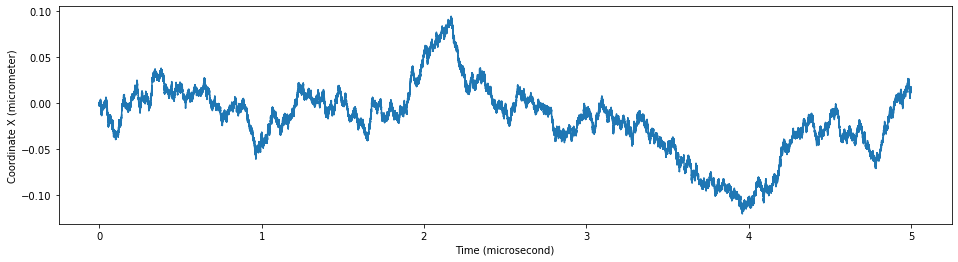

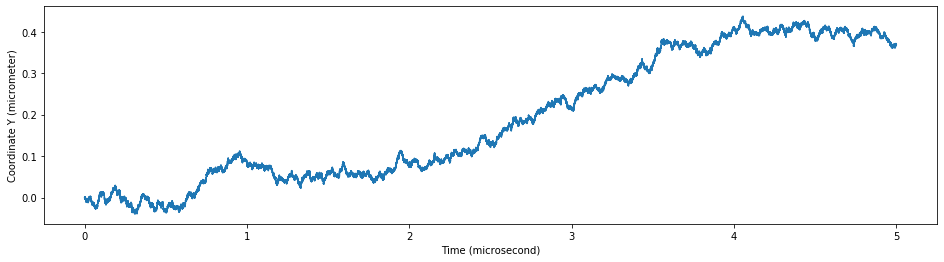

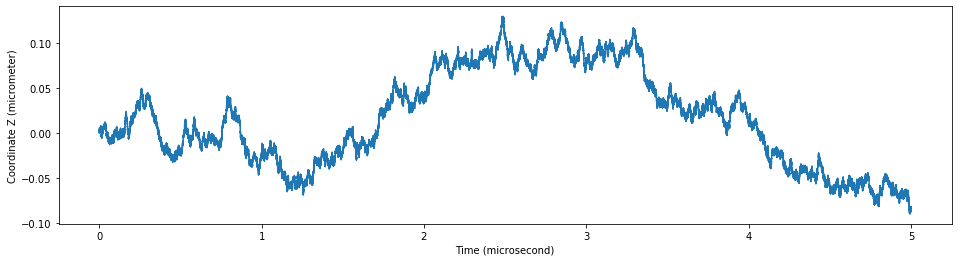

In [2]:
plt.rcParams['figure.figsize'] = [16, 4]

plt.plot(times, positions[:,0,0])
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Coordinate X ({})'.format(unit.micrometer))
plt.show()

plt.plot(times, positions[:,0,1])
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Coordinate Y ({})'.format(unit.micrometer))
plt.show()

plt.plot(times, positions[:,0,2])
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Coordinate Z ({})'.format(unit.micrometer))
plt.show()

## Energía cinética

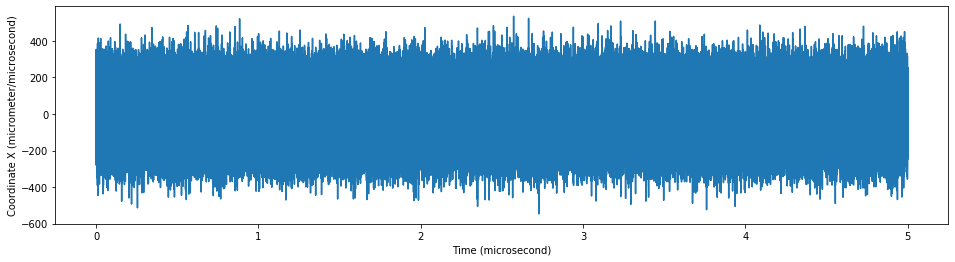

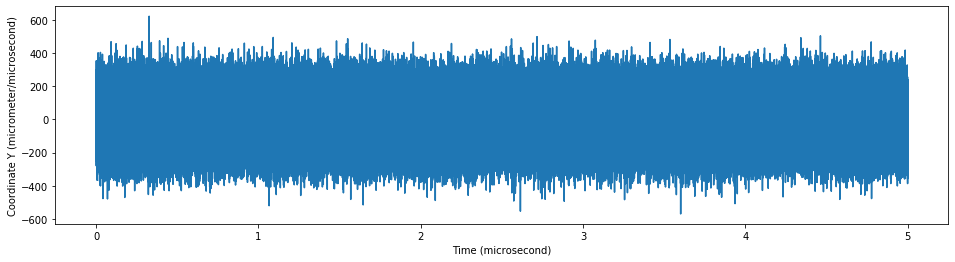

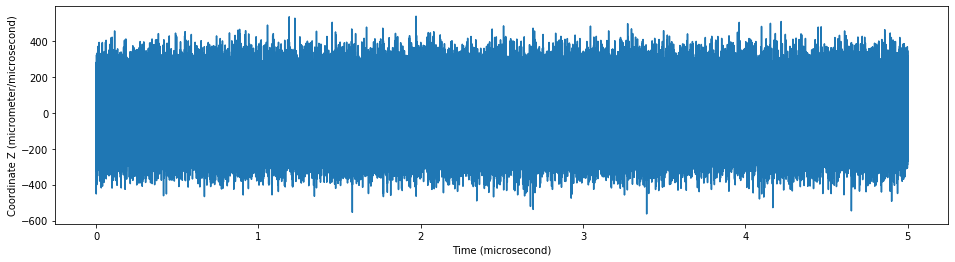

In [3]:
plt.rcParams['figure.figsize'] = [16, 4]
coordinate_labels = ['X', 'Y', 'Z']

for ii in range(3):
    plt.plot(times, velocities[:,0,ii])
    plt.xlabel('Time ({})'.format(unit.microsecond))
    plt.ylabel('Coordinate {} ({})'.format(coordinate_labels[ii], unit.micrometer/unit.microsecond))
    plt.show()

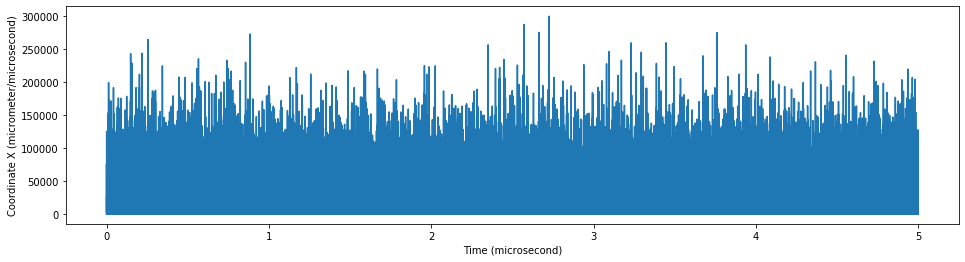

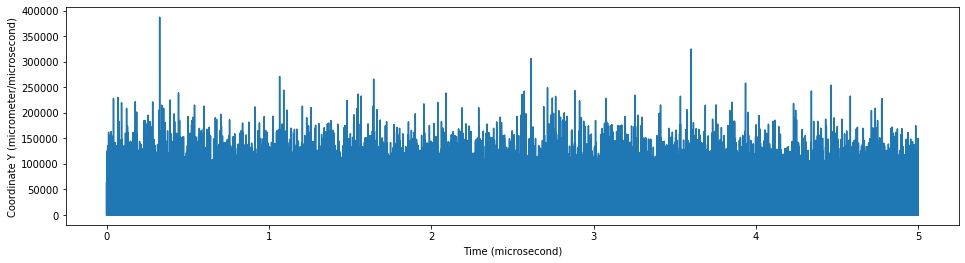

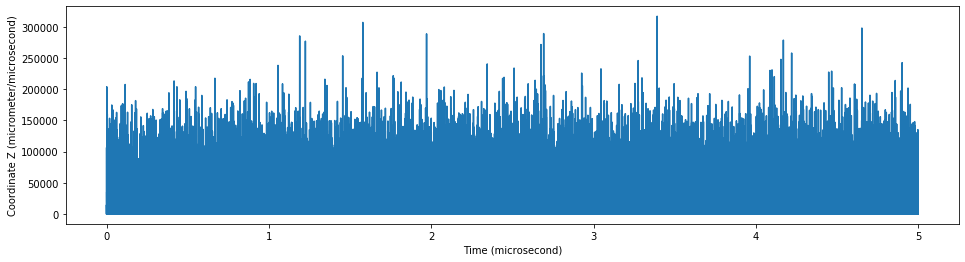

In [4]:
plt.rcParams['figure.figsize'] = [16, 4]
coordinate_labels = ['X', 'Y', 'Z']

for ii in range(3):
    plt.plot(times, velocities[:,0,ii]**2)
    plt.xlabel('Time ({})'.format(unit.microsecond))
    plt.ylabel('Coordinate {} ({})'.format(coordinate_labels[ii], unit.micrometer/unit.microsecond))
    plt.show()


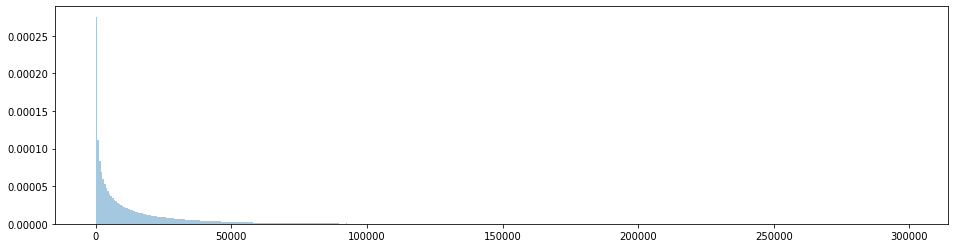

In [6]:
# sns.distplot( velocities[:,0,0]**2 , bins=100, hist_kws={"range": [-500.0, 500.0]}, norm_hist=True )
sns.distplot( velocities[:,0,0]**2 , bins=500, norm_hist=True , kde=False)

In [ ]:
Cambiar el damping para ver que la distribución cambia, pero el promedio no. (ver)

In [7]:
average_square_vx = np.mean(velocities[:,0,0]**2)
average_square_vy = np.mean(velocities[:,0,1]**2)
average_square_vz = np.mean(velocities[:,0,2]**2)

In [8]:
print('Average sqrt(vx):', average_square_vx)
print('Average sqrt(vy):', average_square_vx)
print('Average sqrt(vz):', average_square_vx)

Average sqrt(vx): 13789.602 um**2/(us**2)
Average sqrt(vy): 13789.602 um**2/(us**2)
Average sqrt(vz): 13789.602 um**2/(us**2)


#### Kinetic energy

In [12]:
mass = 180.15 * unit.amu # masa de la glucosa
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA

kinetic_energy_x = 0.5*mass*velocities[:,:,0]**2
kinetic_energy_y = 0.5*mass*velocities[:,:,1]**2
kinetic_energy_z = 0.5*mass*velocities[:,:,2]**2

In [13]:
kinetic_temperature_x =  (2.0 * kinetic_energy_x / kB ).in_units_of(unit.kelvin)
kinetic_temperature_y =  (2.0 * kinetic_energy_y / kB ).in_units_of(unit.kelvin)
kinetic_temperature_z =  (2.0 * kinetic_energy_z / kB ).in_units_of(unit.kelvin)

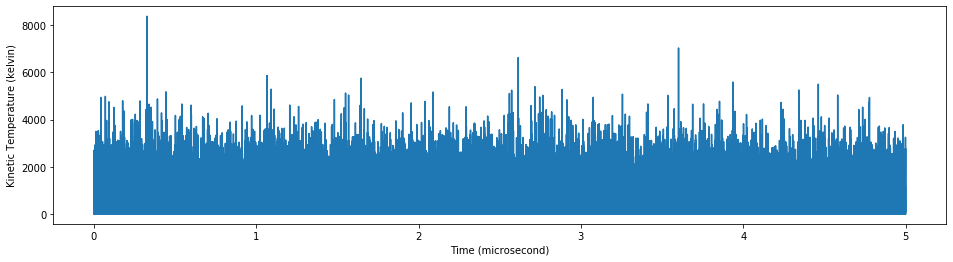

In [15]:
# se puede elegir x, y o z

plt.rcParams['figure.figsize'] = [16, 4]

plt.plot(times, kinetic_temperature_y)
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Kinetic Temperature ({})'.format(unit.kelvin))
plt.show()

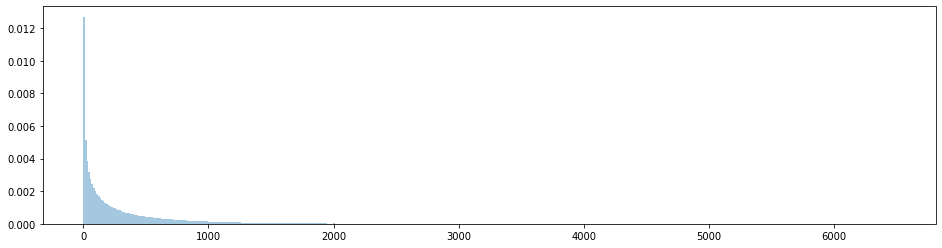

In [16]:
sns.distplot( kinetic_temperature_x , bins=500, norm_hist=True , kde=False)

vemos que la misma partícula toma en ocasiones "temperatura" muy alta. Son fluctuaciones que me serviran para justificar por ejemplo el cruce de barreras cuando se trate de la potencial.

In [17]:
average_kinetic_temperature_x = np.mean(kinetic_temperature_x)

In [18]:
average_kinetic_temperature_x

Quantity(value=298.7798, unit=kelvin)

Si esto es lo que promedia un grado de libertad, para la energía cinética total se relaciona como:

In [19]:
kinetic_energy = kinetic_energy_x + kinetic_energy_y + kinetic_energy_z

In [20]:
kinetic_temperature =  (1.0/3.0)*(2.0 * kinetic_energy / kB ).in_units_of(unit.kelvin)

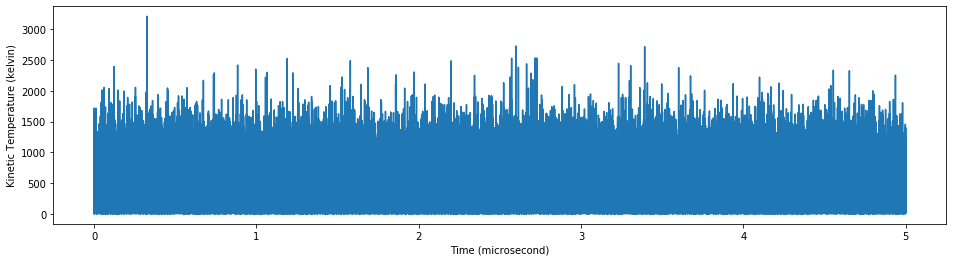

In [21]:
plt.rcParams['figure.figsize'] = [16, 4]

plt.plot(times, kinetic_temperature)
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Kinetic Temperature ({})'.format(unit.kelvin))
plt.show()

Mean temperature:

In [22]:
print('Mean kinetic temperature: {}'.format(kinetic_temperature.mean()))

Mean kinetic temperature: 299.41846 K


In [ ]:
def cumulative_average(serie):
    
    result = np.copy(serie) * serie.unit
    size = len(serie)
    
    for ii in range(size-1):
        value_to_add = result[ii]
        for jj in range(ii+1,size):
            result[jj] = serie[jj] + value_to_add
    
    for ii in range(size):
        result[ii]=result[ii]/(ii+1)
    
    return result

In [ ]:
kinetic_temperature.shape

In [ ]:
plt.rcParams['figure.figsize'] = [16, 4]

plt.scatter(times, kinetic_temperature[:,0], s=1, color='gray')
plt.plot(times, cumulative_average(kinetic_temperature[:,0]), color='red')
plt.xlabel('Time ({})'.format(unit.microsecond))
plt.ylabel('Kinetic Temperature ({})'.format(unit.kelvin))
plt.show()

La rutina cumulative_average puede ser muy costosa. Es uno de los ejemplos que podemos tener para pasarlo a cython o con fortran.

# Difusión

In [23]:
elapsed_saving_steps = 1
delta_x = positions[elapsed_saving_steps:,0,0]-positions[:-elapsed_saving_steps,0,0]

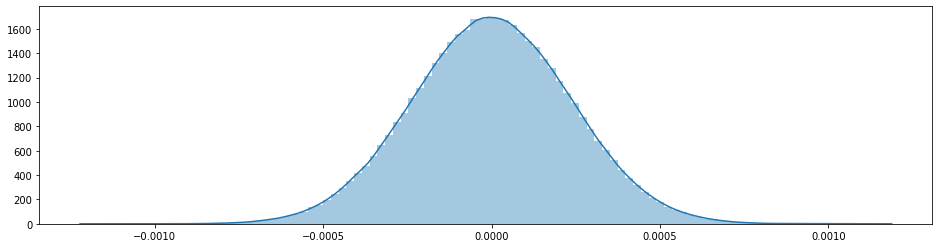

In [24]:
sns.distplot( delta_x, bins=100, norm_hist=True )

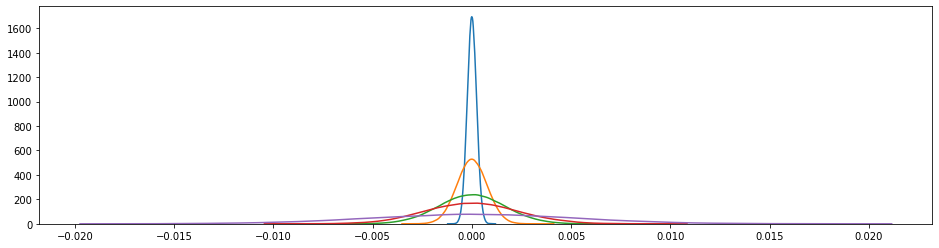

In [25]:
elapsed_saving_steps = [1, 10, 50, 100, 500]

for ii in elapsed_saving_steps:
    delta_x = positions[ii:,0,0]-positions[:-ii,0,0]
    sns.distplot( delta_x, bins=100, norm_hist=True, hist=False )

Esto puede ser interpretado como la probabilidad del incremento en un paso. Es una gaussiana. Y la anchura estará relacionada con el damping y con la temperatura. Y obviamente depende del delta de t. La distribución siempre está centrada en 0 pero su anchura se incrementa.

In [26]:
mean_delta_x = []
std_delta_x = []
delta_time = []
time_step = np.mean(times[1:]-times[:-1])

for ii in range(1,2000):
    delta_x = positions[ii:,0,0]-positions[:-ii,0,0]
    mean_delta_x.append(np.mean(delta_x)._value)
    std_delta_x.append(np.std(delta_x)._value)
    delta_time.append(ii*time_step._value)

delta_time = np.array(delta_time) * time_step.unit
mean_delta_x = np.array(mean_delta_x) * positions.unit
std_delta_x = np.array(std_delta_x) * positions.unit

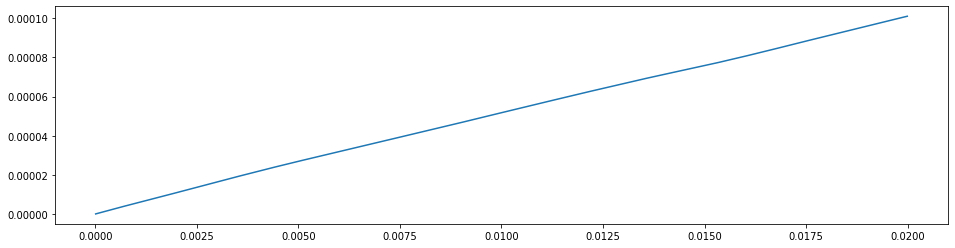

In [28]:
plt.plot(delta_time, std_delta_x**2)

In [ ]:
mean_delta_x_square = []
delta_time = []
time_step = np.mean(times[1:]-times[:-1])

for ii in range(1,2000):
    delta_x = positions[ii:,0,0]-positions[:-ii,0,0]
    mean_delta_x_square.append(np.mean(delta_x**2)._value)
    delta_time.append(ii*time_step._value)

delta_time = np.array(delta_time) * time_step.unit
mean_delta_x_square = np.array(mean_delta_x_square) * positions.unit

In [ ]:
plt.plot(delta_time, mean_delta_x_square)

## Correlación, perdida de memoria, Correlación de velocidad... markovianidad...

## Todo esto puede ser igualmente interpretado promediando sobre un alto número de partículas